# 基于examdata.csv数据，建立逻辑回归模型，评估模型表现

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("examdata.csv")
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


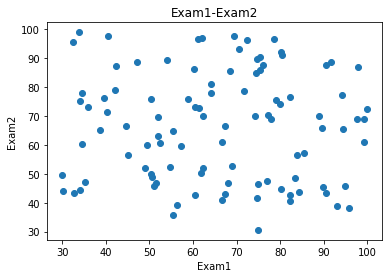

In [4]:
# 数据展示
from matplotlib import pyplot as plt


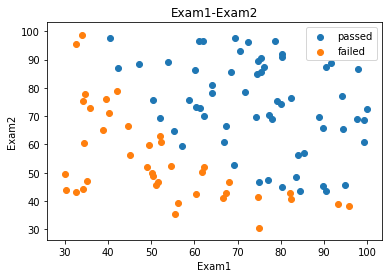

In [10]:
#add label mask
mask = data.loc[:,'Pass']==1

fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),("passed","failed"))
plt.show()

In [17]:
# 定义x，y
X=data.drop(['Pass'],axis=1)
Y=data.loc[:,'Pass']
x1=data.loc[:,'Exam1']
x2=data.loc[:,'Exam2']

In [13]:
#训练模型
from sklearn.linear_model import LogisticRegression

In [14]:
Lr = LogisticRegression()

In [18]:
Lr.fit(X,Y)

LogisticRegression()

In [19]:
Y_predict=Lr.predict(X)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,Y_predict)
accuracy

0.89

# 预测Exam1=75,Exam2=60,该学生能否通过Exam3

In [23]:
y_test=Lr.predict([[75,60]])
print("passed" if y_test else "failed")

passed


In [27]:
a,b = Lr.coef_[0][0],Lr.coef_[0][1]

In [30]:
c = Lr.intercept_[0]

In [31]:
print("a:")
print(a)
print("b:")
print(b)
print("c:")
print(c)

a:
0.20535491217790383
b:
0.20058380395469053
c:
-25.052193142741892


In [33]:
X2_new = -(c+a*x1)/b
X2_new

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64

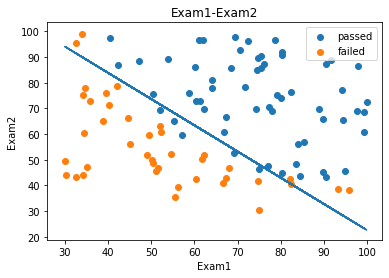

In [34]:
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(x1,X2_new)
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),("passed","failed"))

#边界曲线
plt.show()

# 建立二阶边界函数，重复任务1,2

In [35]:
X1_2=x1*x1
X2_2=x2*x2
X1_X2=x1*x2

In [36]:
X_new={'X1':x1,'X2':x2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
X_new

,X1,X2,X1_2,X2_2,X1_X2
0,34.623660,78.024693,1198.797805,6087.852690,2701.500406
1,30.286711,43.894998,917.284849,1926.770807,1329.435094
2,35.847409,72.902198,1285.036716,5314.730478,2613.354893
3,60.182599,86.308552,3621.945269,7449.166166,5194.273015
4,79.032736,75.344376,6246.173368,5676.775061,5954.672216
...,...,...,...,...,...
95,83.489163,48.380286,6970.440295,2340.652054,4039.229555
96,42.261701,87.103851,1786.051355,7587.080849,3681.156888
97,99.315009,68.775409,9863.470975,4730.056948,6830.430397
98,55.340018,64.931938,3062.517544,4216.156574,3593.334590


In [37]:
# 训练新模型
LR2=LogisticRegression()
LR2.fit(X_new,Y)

LogisticRegression()

In [38]:
y2_predict=LR2.predict(X_new)

In [40]:
accuracy2 = accuracy_score(Y,y2_predict)
accuracy2 #结果为1，百分百分类成功

1.0

In [43]:
theta1,theta2,theta3,theta4,theta5=LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]

In [44]:
theta0=LR2.intercept_

In [45]:
print(theta0,theta1,theta2,theta3,theta4,theta5)

[-0.06202446] -0.8959428182516213 -1.4002939687089717 -0.00022943457236162206 0.003930393115571717 0.03615786759881177


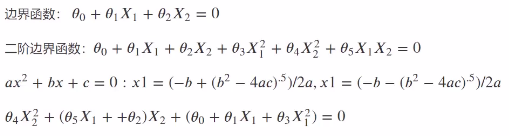

In [50]:
X1_new = x1.sort_values()
a=theta4
b=theta5*X1_new+theta2
c=theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary=(-b+np.sqrt(b*b-4*a*c))/(2*a)
X2_new_boundary

63    132.124249
1     130.914667
57    119.415258
70    118.725082
36    113.258684
         ...    
56     39.275712
47     39.251001
51     38.963585
97     38.955634
75     38.860426
Name: Exam1, Length: 100, dtype: float64

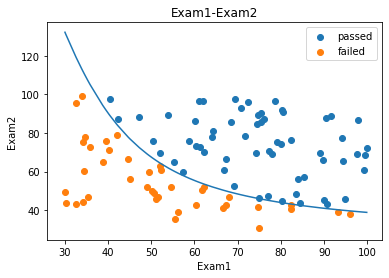

In [55]:
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(X1_new,X2_new_boundary)

plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),("passed","failed"))

#边界曲线
plt.show()
